In [1]:
!pip install pystan~=2.14
!pip install fbprophet
!pip install pandas-datareader


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 12.4 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9537128 sha256=e7808c34912d64eb4763af6bba43aeb9df6a56e273bfb33e04a218eb4d37d52d
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.1.0
    Uninstalling cmdstanpy-1.1.0:
      Successfully uninstalled cmdsta

In [2]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 KB 11.1 MB/s eta 0:00:00
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [3]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot
import pandas as pd
from sklearn.metrics import mean_absolute_error
from fbprophet import Prophet
import pandas_datareader as pdr

In [4]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 79.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.2 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
#stock = input("Enter the nasadq index: \n")
#df = pdr.get_data_yahoo(stock)
#df = pdr.get_data_yahoo('TSLA')

df=pd.read_csv("Tel2.csv")
df

,date,T2M,RH2M,WS2M,WD2M,ALLSKY_KT,GWETTOP,EVLAND,PS,PRECIPITATIONCAL,MEI,PC1,PC2,amplitude
0,01-01-2015,25.91,52.62,1.18,118.75,0.52,0.20,0.97,97.99,0.03,0.23,-1.40015,0.96675,1.70148
1,02-01-2015,25.30,60.81,2.00,138.69,0.47,0.26,3.74,98.31,0.00,0.23,-1.74316,1.00767,2.01346
2,03-01-2015,23.36,79.56,2.67,225.12,0.24,0.55,25.74,98.46,24.49,0.23,-2.03657,1.02990,2.28217
3,04-01-2015,22.07,73.75,2.25,193.50,0.41,0.59,20.99,98.62,0.00,0.23,-2.26712,1.02739,2.48905
4,05-01-2015,20.24,62.62,2.44,12.06,0.65,0.54,17.25,98.64,0.00,0.23,-2.42346,0.99678,2.62044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,27-12-2021,21.93,79.38,1.53,163.81,0.37,0.57,17.00,98.68,0.00,-1.21,-0.70756,0.47105,0.85002
2553,28-12-2021,21.89,78.69,2.07,169.56,0.49,0.57,20.24,98.59,0.08,-1.21,-0.65159,0.47253,0.80489
2554,29-12-2021,22.28,76.00,1.88,165.00,0.51,0.57,20.51,98.58,0.18,-1.21,-0.55501,0.44320,0.71026
2555,30-12-2021,21.40,78.12,1.48,78.75,0.55,0.57,17.85,98.84,0.00,-1.21,-0.42160,0.38602,0.57163


In [32]:
df=df.reset_index()
df.rename(columns={'date': 'ds', 'T2M': 'y'}, inplace=True)

In [33]:
df

,index,ds,y,RH2M,WS2M,WD2M,ALLSKY_KT,GWETTOP,EVLAND,PS,PRECIPITATIONCAL,MEI,PC1,PC2,amplitude
0,0,01-01-2015,25.91,52.62,1.18,118.75,0.52,0.20,0.97,97.99,0.03,0.23,-1.40015,0.96675,1.70148
1,1,02-01-2015,25.30,60.81,2.00,138.69,0.47,0.26,3.74,98.31,0.00,0.23,-1.74316,1.00767,2.01346
2,2,03-01-2015,23.36,79.56,2.67,225.12,0.24,0.55,25.74,98.46,24.49,0.23,-2.03657,1.02990,2.28217
3,3,04-01-2015,22.07,73.75,2.25,193.50,0.41,0.59,20.99,98.62,0.00,0.23,-2.26712,1.02739,2.48905
4,4,05-01-2015,20.24,62.62,2.44,12.06,0.65,0.54,17.25,98.64,0.00,0.23,-2.42346,0.99678,2.62044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2552,27-12-2021,21.93,79.38,1.53,163.81,0.37,0.57,17.00,98.68,0.00,-1.21,-0.70756,0.47105,0.85002
2553,2553,28-12-2021,21.89,78.69,2.07,169.56,0.49,0.57,20.24,98.59,0.08,-1.21,-0.65159,0.47253,0.80489
2554,2554,29-12-2021,22.28,76.00,1.88,165.00,0.51,0.57,20.51,98.58,0.18,-1.21,-0.55501,0.44320,0.71026
2555,2555,30-12-2021,21.40,78.12,1.48,78.75,0.55,0.57,17.85,98.84,0.00,-1.21,-0.42160,0.38602,0.57163


In [34]:
df.isna().sum()

index               0
ds                  0
y                   0
RH2M                0
WS2M                0
WD2M                0
ALLSKY_KT           0
GWETTOP             0
EVLAND              0
PS                  0
PRECIPITATIONCAL    0
MEI                 0
PC1                 0
PC2                 0
amplitude           0
dtype: int64

In [35]:
df.describe()

,index,y,RH2M,WS2M,WD2M,ALLSKY_KT,GWETTOP,EVLAND,PS,PRECIPITATIONCAL,MEI,PC1,PC2,amplitude
count,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000
mean,1278.000000,27.507544,59.020375,2.120907,173.706074,0.543121,0.508913,24.405632,97.985436,2.837165,-0.071991,-0.006031,-0.000786,1.113203
std,738.286643,4.622535,22.619968,0.934202,80.824759,0.129580,0.260140,20.762325,0.467326,8.480810,0.963110,0.904152,0.872560,0.582394
min,0.000000,16.610000,8.690000,0.560000,11.310000,0.070000,0.120000,0.090000,96.760000,0.000000,-1.530000,-2.496940,-2.598810,0.011970
25%,639.000000,24.690000,37.810000,1.400000,112.190000,0.480000,0.250000,3.710000,97.580000,0.000000,-0.790000,-0.633300,-0.585890,0.673900
50%,1278.000000,26.970000,62.120000,1.900000,166.380000,0.580000,0.530000,21.610000,97.960000,0.000000,-0.240000,-0.024300,0.039390,1.039910
75%,1917.000000,30.120000,80.560000,2.670000,250.940000,0.640000,0.750000,41.900000,98.400000,1.100000,0.350000,0.635940,0.563920,1.491530
max,2556.000000,39.620000,94.060000,6.940000,341.120000,0.750000,0.990000,81.680000,99.010000,132.090000,2.210000,2.875470,2.840250,2.886400


In [36]:
df.describe

<bound method NDFrame.describe of       index          ds      y   RH2M  WS2M    WD2M  ALLSKY_KT  GWETTOP  \
0         0  01-01-2015  25.91  52.62  1.18  118.75       0.52     0.20   
1         1  02-01-2015  25.30  60.81  2.00  138.69       0.47     0.26   
2         2  03-01-2015  23.36  79.56  2.67  225.12       0.24     0.55   
3         3  04-01-2015  22.07  73.75  2.25  193.50       0.41     0.59   
4         4  05-01-2015  20.24  62.62  2.44   12.06       0.65     0.54   
...     ...         ...    ...    ...   ...     ...        ...      ...   
2552   2552  27-12-2021  21.93  79.38  1.53  163.81       0.37     0.57   
2553   2553  28-12-2021  21.89  78.69  2.07  169.56       0.49     0.57   
2554   2554  29-12-2021  22.28  76.00  1.88  165.00       0.51     0.57   
2555   2555  30-12-2021  21.40  78.12  1.48   78.75       0.55     0.57   
2556   2556  31-12-2021  21.59  72.88  1.20   60.06       0.59     0.56   

      EVLAND     PS  PRECIPITATIONCAL   MEI      PC1      PC2  am

In [37]:
df.shape

(2557, 15)

In [38]:
df=df.dropna()

In [39]:
import numpy as np
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
mean_imputer.fit_transform((df['y'].values).reshape(-1,1))

array([[25.91],
       [25.3 ],
       [23.36],
       ...,
       [22.28],
       [21.4 ],
       [21.59]])

<AxesSubplot:xlabel='y'>

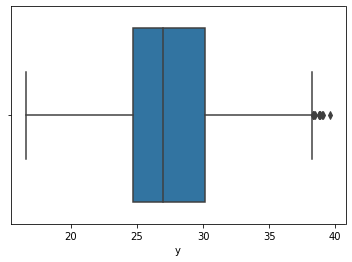

In [40]:
import seaborn as sns
sns.boxplot(x=df['y'])

In [41]:
# q1 = df.quantile(0.25)
# q3 = df.quantile(0.75)
# iqr = q3-q1
# print((df['y']<(q1-1.5*iqr)) | (df['y']>(q3+1.5*iqr)))

In [42]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [44]:
future_dates=model.make_future_dataframe(periods=30)

In [45]:
future_dates.tail()

,ds
2582,2022-01-26
2583,2022-01-27
2584,2022-01-28
2585,2022-01-29
2586,2022-01-30


In [46]:
prediction = model.predict(future_dates)

In [21]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2582,2022-01-26,26.170512,17.471815,27.511801,26.170444,26.170516,-3.605946,-3.605946,-3.605946,0.083727,0.083727,0.083727,-3.689673,-3.689673,-3.689673,0.0,0.0,0.0,22.564566
2583,2022-01-27,26.169661,17.482918,27.564201,26.169586,26.169673,-3.560922,-3.560922,-3.560922,-0.008690,-0.008690,-0.008690,-3.552232,-3.552232,-3.552232,0.0,0.0,0.0,22.608739
2584,2022-01-28,26.168810,17.987751,27.747247,26.168726,26.168827,-3.523753,-3.523753,-3.523753,-0.128820,-0.128820,-0.128820,-3.394933,-3.394933,-3.394933,0.0,0.0,0.0,22.645057
2585,2022-01-29,26.167959,17.775600,28.144766,26.167858,26.167981,-3.157674,-3.157674,-3.157674,0.062587,0.062587,0.062587,-3.220261,-3.220261,-3.220261,0.0,0.0,0.0,23.010286
2586,2022-01-30,26.167109,17.861181,28.255183,26.167001,26.167132,-3.017071,-3.017071,-3.017071,0.014038,0.014038,0.014038,-3.031109,-3.031109,-3.031109,0.0,0.0,0.0,23.150037


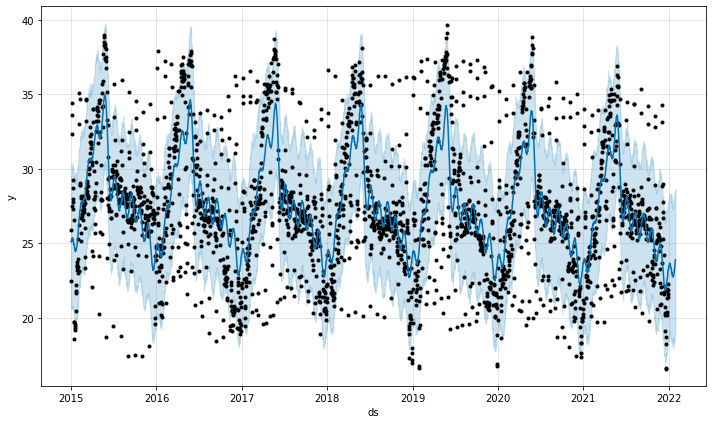

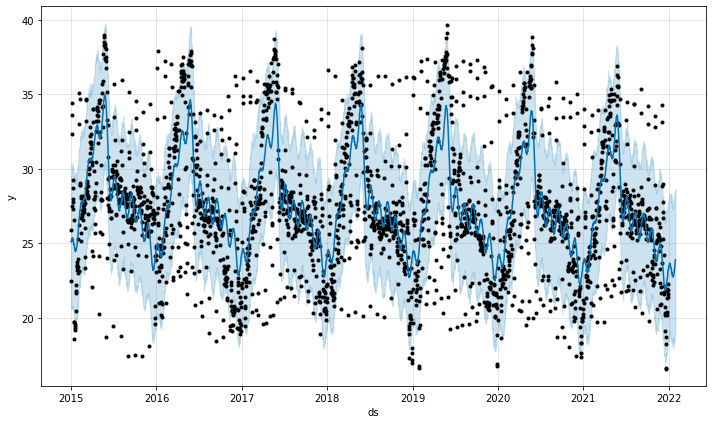

In [47]:
model.plot(prediction)

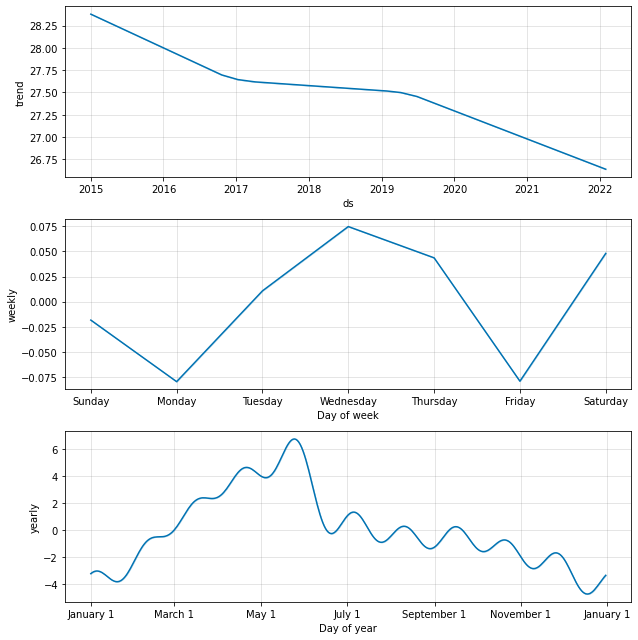

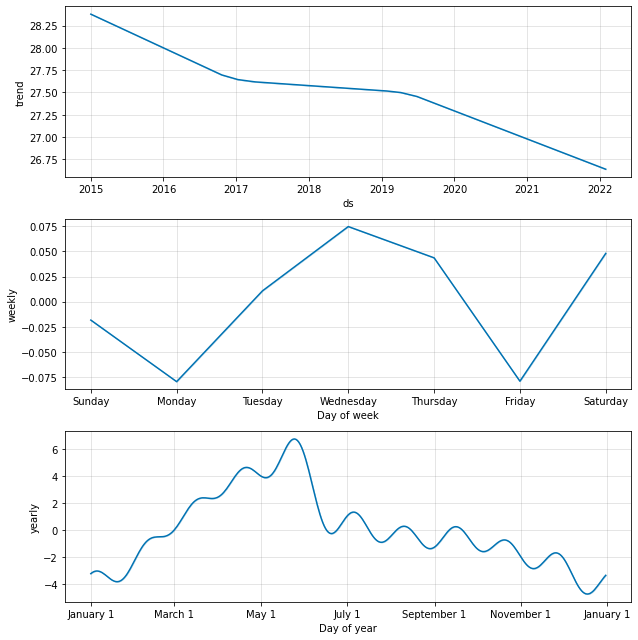

In [48]:
model.plot_components(prediction)

In [50]:
prediction.tail(60)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2527,2021-12-02,26.688902,20.023865,28.900228,26.688902,26.688902,-2.201208,-2.201208,-2.201208,0.043609,0.043609,0.043609,-2.244817,-2.244817,-2.244817,0.0,0.0,0.0,24.487693
2528,2021-12-03,26.688040,19.367373,28.689514,26.688040,26.688040,-2.498394,-2.498394,-2.498394,-0.079167,-0.079167,-0.079167,-2.419227,-2.419227,-2.419227,0.0,0.0,0.0,24.189646
2529,2021-12-04,26.687179,19.323216,28.861527,26.687179,26.687179,-2.562691,-2.562691,-2.562691,0.048044,0.048044,0.048044,-2.610735,-2.610735,-2.610735,0.0,0.0,0.0,24.124488
2530,2021-12-05,26.686317,19.225708,28.577220,26.686317,26.686317,-2.833820,-2.833820,-2.833820,-0.018353,-0.018353,-0.018353,-2.815466,-2.815466,-2.815466,0.0,0.0,0.0,23.852497
2531,2021-12-06,26.685456,18.586546,28.024987,26.685456,26.685456,-3.108778,-3.108778,-3.108778,-0.079611,-0.079611,-0.079611,-3.029167,-3.029167,-3.029167,0.0,0.0,0.0,23.576678
2532,2021-12-07,26.684594,18.718546,28.031711,26.684594,26.684594,-3.236582,-3.236582,-3.236582,0.010737,0.010737,0.010737,-3.247319,-3.247319,-3.247319,0.0,0.0,0.0,23.448012
2533,2021-12-08,26.683733,18.613702,28.058983,26.683733,26.683733,-3.390524,-3.390524,-3.390524,0.074742,0.074742,0.074742,-3.465267,-3.465267,-3.465267,0.0,0.0,0.0,23.293208
2534,2021-12-09,26.682871,18.638174,28.201297,26.682871,26.682871,-3.634735,-3.634735,-3.634735,0.043609,0.043609,0.043609,-3.678343,-3.678343,-3.678343,0.0,0.0,0.0,23.048137
2535,2021-12-10,26.682010,18.138371,27.721509,26.682010,26.682010,-3.961166,-3.961166,-3.961166,-0.079167,-0.079167,-0.079167,-3.881999,-3.881999,-3.881999,0.0,0.0,0.0,22.720844
2536,2021-12-11,26.681148,18.029018,27.430704,26.681148,26.681148,-4.023878,-4.023878,-4.023878,0.048044,0.048044,0.048044,-4.071922,-4.071922,-4.071922,0.0,0.0,0.0,22.657270


In [51]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from math import sqrt
print(sqrt(mean_squared_error(df["y"].iloc[-31:], prediction["yhat"].loc[2526:2556])))
print(mean_absolute_error(df["y"].iloc[-31:],prediction["yhat"].loc[2526:2556])) 
print(mean_absolute_percentage_error(df["y"].iloc[-31:],prediction["yhat"].loc[2526:2556]))

2.2986214234769773
1.847072830191953
0.09342776927711106
